In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import scipy.stats as st
import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


In [3]:
print(cities)

['east london', 'cayenne', 'rikitea', 'bambous virieux', 'nago', 'nouadhibou', 'srandakan', 'marcona', 'beringovskiy', 'lebu', 'ushuaia', 'saint pete beach', 'port alfred', 'ulladulla', 'namie', 'georgetown', 'broome', 'bilma', 'piopio', 'cidreira', 'kavieng', 'dukat', 'vitorino freire', 'thompson', 'bluff', 'brigantine', 'punta arenas', 'springbok', 'belushya guba', 'torbay', 'el alto', 'cherskiy', 'ouallam', 'vaini', 'taolanaro', 'kahului', 'avarua', 'gwadar', 'road town', 'brainerd', 'cabo san lucas', 'port blair', 'cairns', 'hualmay', 'ponta do sol', 'castro', 'iquitos', 'hilo', 'katsuura', 'atuona', 'tahoua', 'yarim', 'sentyabrskiy', 'upernavik', 'tuktoyaktuk', 'busselton', 'malinovskiy', 'khatanga', 'lagodekhi', 'batouri', 'kerema', 'sioux lookout', 'butaritari', 'narsaq', 'bredasdorp', 'cabra', 'half moon bay', 'yellowknife', 'dudinka', 'qaanaaq', 'kibuye', 'beloha', 'kushima', 'leh', 'polyarnyy', 'pervoye maya', 'kodiak', 'ostrovnoy', 'kavaratti', 'jamestown', 'geraldton', 'meg

In [4]:
# Set the API base URL
units = "imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"
q_url = f"{url}appid={weather_api_key}&units=metric&q="

In [5]:
# response = requests.get(q_url + city).json()
# pprint(response)

In [6]:
# Define an empty list to fetch the weather data for each city
city_data = []
city_lat = []
city_lan = []
city_max_temp = []
city_humidity = []
city_clouds = []
city_wind = []
city_country = []
city_date = []

# Create counters
record_count = 1
set_count = 1

In [7]:
enumerate(cities)

In [8]:
# for i, city in enumerate(cities):
#     try:
#         response = requests.get(q_url +  city).json()
        

In [9]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
#cities = cities[0:1]
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #print(city_weather)



        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as err:
        print(f"City not found. Skipping... {str(err)}")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | east london
Processing Record 2 of Set 1 | cayenne
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | bambous virieux
Processing Record 5 of Set 1 | nago
Processing Record 6 of Set 1 | nouadhibou
Processing Record 7 of Set 1 | srandakan
Processing Record 8 of Set 1 | marcona
City not found. Skipping... 'coord'
Processing Record 9 of Set 1 | beringovskiy
Processing Record 10 of Set 1 | lebu
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | saint pete beach
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | ulladulla
Processing Record 15 of Set 1 | namie
Processing Record 16 of Set 1 | georgetown
Processing Record 17 of Set 1 | broome
Processing Record 18 of Set 1 | bilma
Processing Record 19 of Set 1 | piopio
Processing Record 20 of Set 1 | cidreira
Processing Record 21 of Set 1 | kavieng
Processing Record 22 of Set 1 | dukat
Proces

In [20]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,east london,-33.0153,27.9116,28.52,74,20,4.12,ZA,1675686662
1,cayenne,4.9333,-52.3333,25.02,88,75,3.60,GF,1675686663
2,rikitea,-23.1203,-134.9692,25.18,76,21,1.90,PF,1675686664
3,bambous virieux,-20.3428,57.7575,29.14,70,75,3.60,MU,1675686667
4,nago,26.5881,127.9761,19.47,89,40,6.89,JP,1675686668


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,east london,-33.0153,27.9116,28.52,74,20,4.12,ZA,1675686662
1,cayenne,4.9333,-52.3333,25.02,88,75,3.60,GF,1675686663
2,rikitea,-23.1203,-134.9692,25.18,76,21,1.90,PF,1675686664
3,bambous virieux,-20.3428,57.7575,29.14,70,75,3.60,MU,1675686667
4,nago,26.5881,127.9761,19.47,89,40,6.89,JP,1675686668


In [14]:
city_data_df.tail()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
565,ambon,-3.6954,128.1814,28.08,74,40,1.54,ID,1675686943
566,rocha,-34.4833,-54.3333,28.71,31,15,1.77,UY,1675686686
567,digboi,27.3833,95.6333,19.39,43,88,0.59,IN,1675686944
568,samarai,-10.6167,150.6667,26.23,83,100,5.20,PG,1675686944
569,lakefield,43.6775,-95.1717,-4.84,93,0,7.72,US,1675686945


In [15]:
# Get the time from DT 
date = city_data_df["Date"]
 
unixToDatetime = datetime.datetime.fromtimestamp(date[0]) # Unix Time
print(unixToDatetime)

2023-02-06 07:31:02


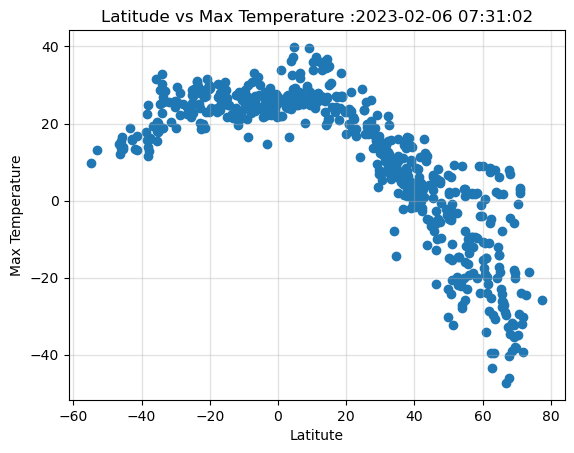

In [16]:
# Build scatter plot for latitude vs. temperature
x_ax = city_data_df["Lat"]
y_ax = city_data_df["Max Temp"]
plt.xlabel("Latitute")
plt.ylabel("Max Temperature")
plt.title(f"Latitude vs Max Temperature :{unixToDatetime}")
plt.scatter(x_ax, y_ax, marker="o", label="Cities")

# YOUR CODE HERE

# Incorporate the other graph properties
plt.grid(linestyle='-', linewidth=1, alpha = 0.35)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

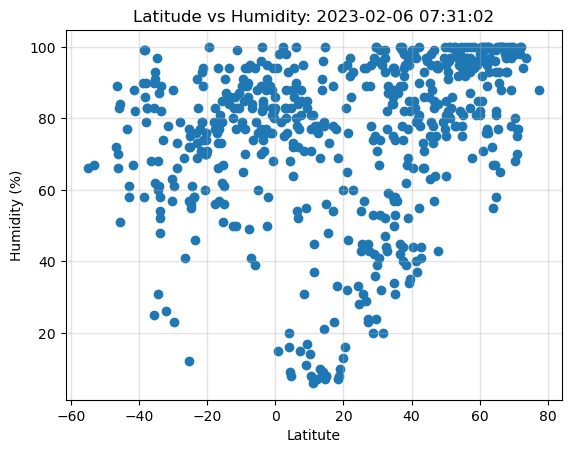

In [17]:
# Build the scatter plots for latitude vs. humidity
x_ax1 = city_data_df["Lat"]
y_ax1 = city_data_df["Humidity"]
plt.xlabel("Latitute")
plt.ylabel("Humidity (%)")
plt.title(f"Latitude vs Humidity: {unixToDatetime}")
plt.scatter(x_ax1, y_ax1, marker="o", label="Cities")

# Incorporate the other graph properties
plt.grid(linestyle='-', linewidth=1, alpha = 0.35)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

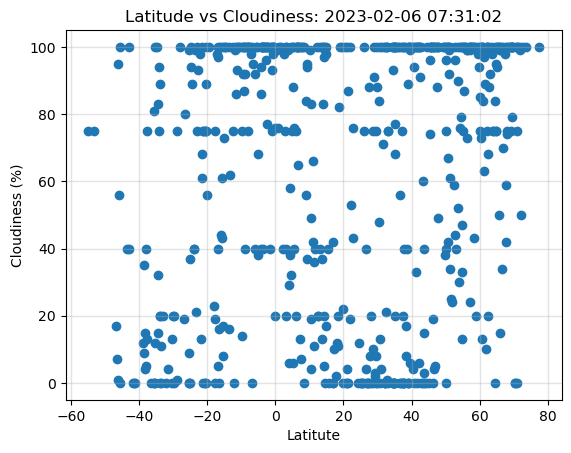

In [18]:
# Build the scatter plots for latitude vs. cloudiness
x_ax2 = city_data_df["Lat"]
y_ax2 = city_data_df["Cloudiness"]
plt.xlabel("Latitute")
plt.ylabel("Cloudiness (%)")
plt.title(f"Latitude vs Cloudiness: {unixToDatetime}")
plt.scatter(x_ax2, y_ax2, marker="o", label="Cities")

# Incorporate the other graph properties
plt.grid(linestyle='-', linewidth=1, alpha = 0.35)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

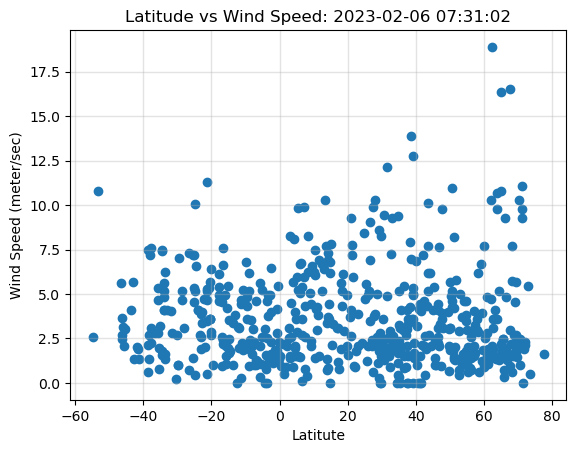

In [21]:
# Build the scatter plots for latitude vs. wind speed
x_ax2 = city_data_df["Lat"]
y_ax2 = city_data_df["Wind Speed"]
plt.xlabel("Latitute")
plt.ylabel("Wind Speed (meter/sec)")
plt.title(f"Latitude vs Wind Speed: {unixToDatetime}")
plt.scatter(x_ax2, y_ax2, marker="o", label="Cities")

# Incorporate the other graph properties
plt.grid(linestyle='-', linewidth=1, alpha = 0.35)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

In [ ]:
# Define a function to create Linear Regression plots
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi = city_data_df.loc[city_data_df["Lat"] >= 0]
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi = city_data_df.loc[city_data_df["Lat"] < 0]

In [ ]:
# Sample northern hemi
northern_hemi.sample(15)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
69,vardo,70.3705,31.1107,-7.01,93,100,11.83,NO,1675639705
411,kenai,60.5544,-151.2583,-1.62,76,100,15.95,US,1675639965
247,balabac,7.9868,117.0645,26.56,80,55,6.33,PH,1675639449
133,roald,62.5833,6.1333,6.16,81,100,7.20,NO,1675639861
445,les cayes,18.2000,-73.7500,23.62,81,4,2.88,HT,1675639975
417,faya,18.3851,42.4509,11.29,66,87,1.48,SA,1675639967
137,khatanga,71.9667,102.5000,-37.12,99,57,2.89,RU,1675639667
40,thinadhoo,0.5333,72.9333,27.05,69,100,3.32,MV,1675639838
319,mogzon,51.7435,111.9606,-26.51,100,96,1.55,RU,1675639928


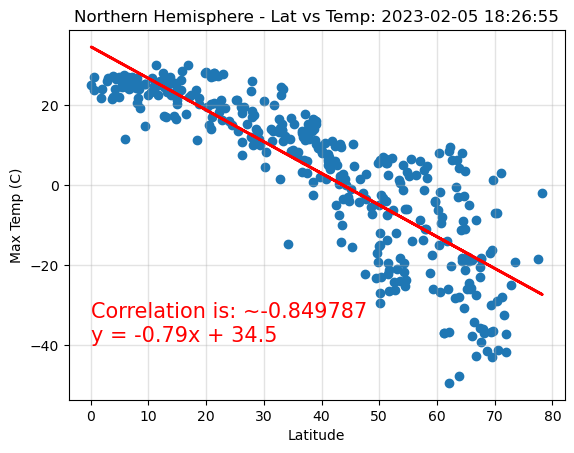

In [ ]:
# Linear regression on Northern Hemisphere Lat vs Temp
x_ax = northern_hemi["Lat"]
y_ax = northern_hemi["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title(f"Northern Hemisphere - Lat vs Temp: {unixToDatetime}",fontsize = 10, fontweight="bold")
# Correlation.
corr1 = st.pearsonr(x_ax, y_ax)
# Linear Regression.
d_slope, d_int, d_r, d_p, d_std_err = st.linregress(x_ax, y_ax)
d_fit = d_slope * x_ax + d_int
# Plot the main scatter.
plt.scatter(x_ax, y_ax)
# Plot the line.
plt.plot(x_ax ,d_fit,"r-", linewidth=2)
# get the equation and text generated into variables to display later to chart.
line_eq = "y = " + str(round(d_slope,2)) + "x + " + str(round(d_int,2))
line_eq1 = "Correlation is: ~" + str(round(corr1[0],6))
# add the line equation to the chart.
plt.annotate(line_eq, (0,-39), fontsize=15,color="red")
# add the Correlation to the chart.
plt.text(0, -33, line_eq1, fontsize=15,color="red")
plt.grid(linestyle='-', linewidth=1, alpha = 0.35)
# Show the graph
plt.show()


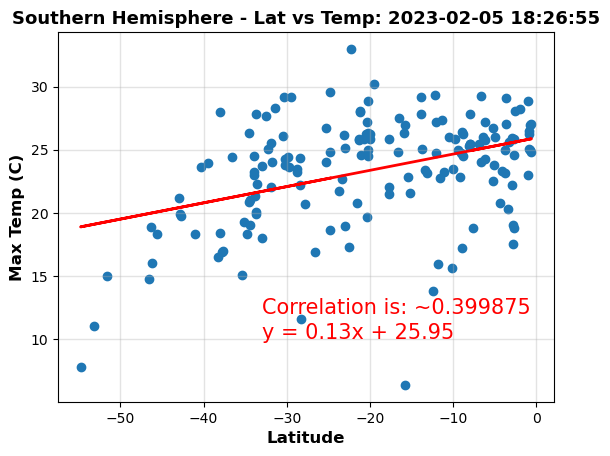

In [ ]:
# Linear regression on Southern Hemisphere Lat vs Temp
x_ax1 = southern_hemi["Lat"]
y_ax1 = southern_hemi["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title(f"Southern Hemisphere - Lat vs Temp: {unixToDatetime}",fontsize = 10, fontweight="bold")
# Correlation.
corr1 = st.pearsonr(x_ax1, y_ax1)
# Linear Regression.
d_slope, d_int, d_r, d_p, d_std_err = st.linregress(x_ax1, y_ax1)
d_fit = d_slope * x_ax1 + d_int
# Plot the main scatter.
plt.scatter(x_ax1, y_ax1)
# Plot the line.
plt.plot(x_ax1 ,d_fit,"r-", linewidth=2)
# get the equation and text generated into variables to display later to chart.
line_eq = "y = " + str(round(d_slope,2)) + "x + " + str(round(d_int,2))
line_eq1 = "Correlation is: ~" + str(round(corr1[0],6))
# add the line equation to the chart.
plt.annotate(line_eq, (-33, 10), fontsize=15,color="red")
# add the Correlation to the chart.
plt.text(-33, 12, line_eq1, fontsize=15,color="red")
plt.grid(linestyle='-', linewidth=1, alpha = 0.35)
# Show the graph
plt.show()

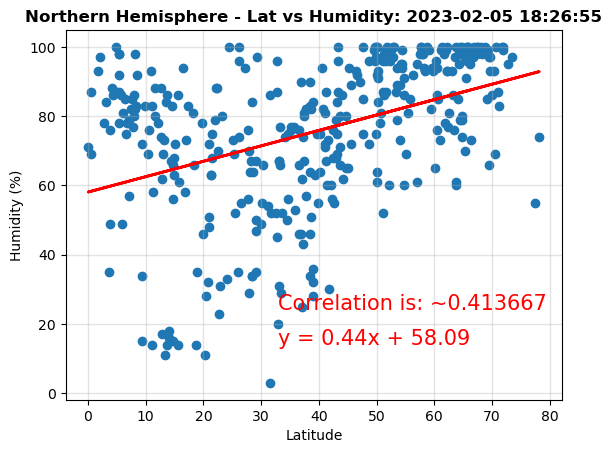

In [ ]:
# Linnear Regression Northern Hemisphere
x_ax2 = northern_hemi["Lat"]
y_ax2 = northern_hemi["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Northern Hemisphere - Lat vs Humidity: {unixToDatetime}",fontsize = 10, fontweight="bold")
# Correlation.
corr1 = st.pearsonr(x_ax2, y_ax2)
# Linear Regression.
d_slope, d_int, d_r, d_p, d_std_err = st.linregress(x_ax2, y_ax2)
d_fit = d_slope * x_ax2 + d_int
# Plot the main scatter.
plt.scatter(x_ax2, y_ax2)
# Plot the line.
plt.plot(x_ax2 ,d_fit,"r-", linewidth=2)
# get the equation and text generated into variables to display later to chart.
line_eq = "y = " + str(round(d_slope,2)) + "x + " + str(round(d_int,2))
line_eq1 = "Correlation is: ~" + str(round(corr1[0],6))
# add the line equation to the chart.
plt.annotate(line_eq, (33, 14), fontsize=15,color="red")
# add the Correlation to the chart.
plt.text(33, 24, line_eq1, fontsize=15,color="red")
plt.grid(linestyle='-', linewidth=1, alpha = 0.35)
# Show the graph
plt.show()

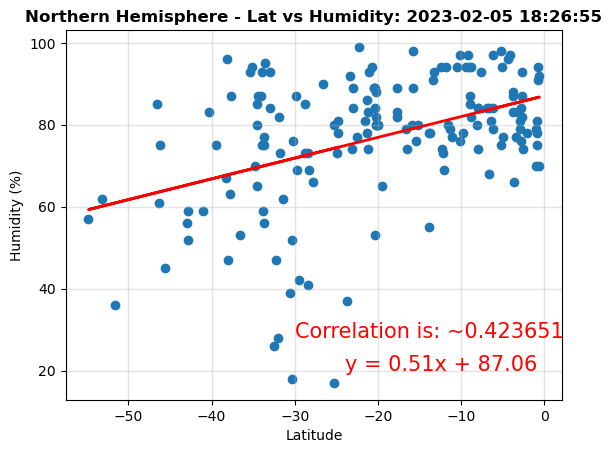

In [ ]:
# Linnear Regression Southern Hemisphere for Lat vs Humidity
x_ax3 = southern_hemi["Lat"]
y_ax3 = southern_hemi["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Northern Hemisphere - Lat vs Humidity: {unixToDatetime}",fontsize = 10, fontweight="bold")
# Correlation.
corr1 = st.pearsonr(x_ax3, y_ax3)
# Linear Regression.
d_slope, d_int, d_r, d_p, d_std_err = st.linregress(x_ax3, y_ax3)
d_fit = d_slope * x_ax3 + d_int
# Plot the main scatter.
plt.scatter(x_ax3, y_ax3)
# Plot the line.
plt.plot(x_ax3 ,d_fit,"r-", linewidth=2)
# get the equation and text generated into variables to display later to chart.
line_eq = "y = " + str(round(d_slope,2)) + "x + " + str(round(d_int,2))
line_eq1 = "Correlation is: ~" + str(round(corr1[0],6))
# add the line equation to the chart.
plt.annotate(line_eq, (-24, 20), fontsize=15,color="red")
# add the Correlation to the chart.
plt.text(-30, 28, line_eq1, fontsize=15,color="red")
plt.grid(linestyle='-', linewidth=1, alpha = 0.35)
# Show the graph
plt.show()
# YOUR CODE HERE

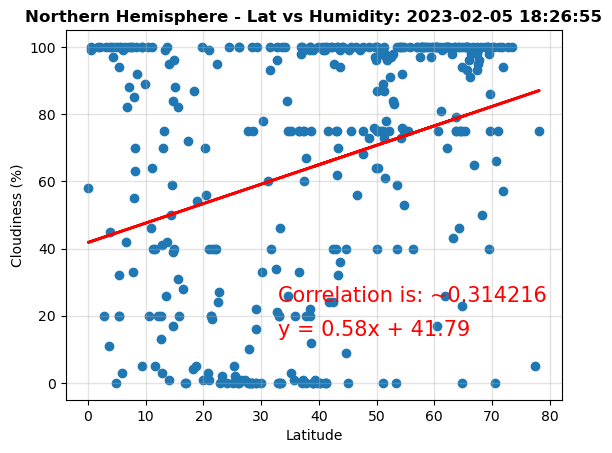

In [ ]:
# Northern Hemisphere
# Linnear Regression Northern Hemisphere Lat vs Cloudiness
x_ax4 = northern_hemi["Lat"]
y_ax4 = northern_hemi["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Northern Hemisphere - Lat vs Humidity: {unixToDatetime}",fontsize = 10, fontweight="bold")
# Correlation.
corr1 = st.pearsonr(x_ax4, y_ax4)
# Linear Regression.
d_slope, d_int, d_r, d_p, d_std_err = st.linregress(x_ax4, y_ax4)
d_fit = d_slope * x_ax4 + d_int
# Plot the main scatter.
plt.scatter(x_ax4, y_ax4)
# Plot the line.
plt.plot(x_ax4 ,d_fit,"r-", linewidth=2)
# get the equation and text generated into variables to display later to chart.
line_eq = "y = " + str(round(d_slope,2)) + "x + " + str(round(d_int,2))
line_eq1 = "Correlation is: ~" + str(round(corr1[0],6))
# add the line equation to the chart.
plt.annotate(line_eq, (33, 14), fontsize=15,color="red")
# add the Correlation to the chart.
plt.text(33, 24, line_eq1, fontsize=15,color="red")
plt.grid(linestyle='-', linewidth=1, alpha = 0.35)
# Show the graph
plt.show()

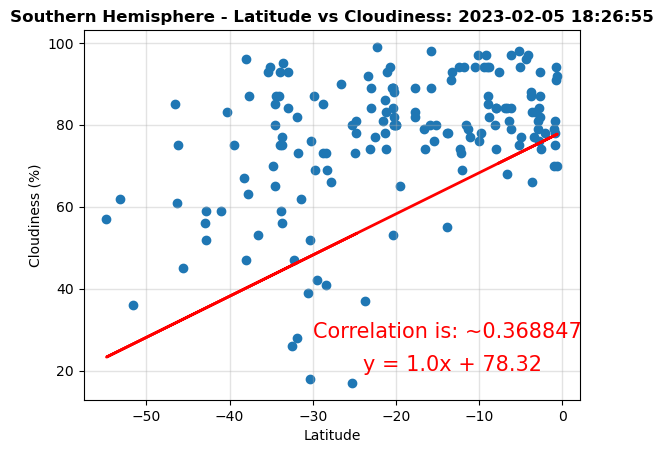

In [ ]:
# Southern Hemisphere Lat vs Cloudiness
x_ax5 = southern_hemi["Lat"]
y_ax5 = southern_hemi["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Southern Hemisphere - Latitude vs Cloudiness: {unixToDatetime}",fontsize = 10, fontweight="bold")
# Correlation.
corr1 = st.pearsonr(x_ax5, y_ax5)
# Linear Regression.
d_slope, d_int, d_r, d_p, d_std_err = st.linregress(x_ax5, y_ax5)
d_fit = d_slope * x_ax5 + d_int
# Plot the main scatter.
plt.scatter(x_ax5, y_ax3)
# Plot the line.
plt.plot(x_ax5 ,d_fit,"r-", linewidth=2)
# get the equation and text generated into variables to display later to chart.
line_eq = "y = " + str(round(d_slope,2)) + "x + " + str(round(d_int,2))
line_eq1 = "Correlation is: ~" + str(round(corr1[0],6))
# add the line equation to the chart.
plt.annotate(line_eq, (-24, 20), fontsize=15,color="red")
# add the Correlation to the chart.
plt.text(-30, 28, line_eq1, fontsize=15,color="red")
plt.grid(linestyle='-', linewidth=1, alpha = 0.35)
# Show the graph
plt.show()


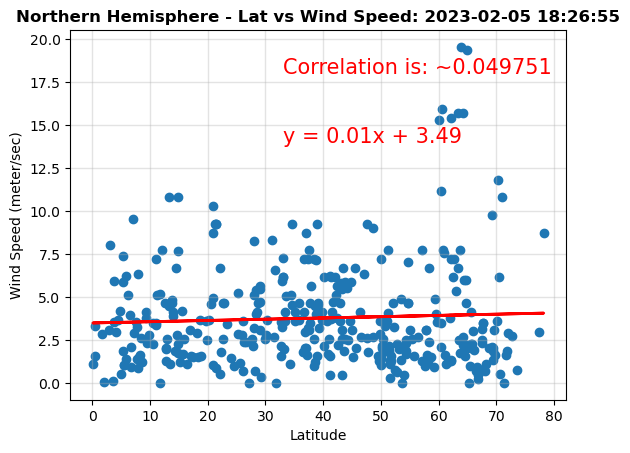

In [ ]:
# Northern Hemisphere
x_ax6 = northern_hemi["Lat"]
y_ax6 = northern_hemi["Wind Speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (meter/sec)")
plt.title(f"Northern Hemisphere - Lat vs Wind Speed: {unixToDatetime}",fontsize = 10, fontweight="bold")
# Correlation.
corr1 = st.pearsonr(x_ax6, y_ax6)
# Linear Regression.
d_slope, d_int, d_r, d_p, d_std_err = st.linregress(x_ax6, y_ax6)
d_fit = d_slope * x_ax6 + d_int
# Plot the main scatter.
plt.scatter(x_ax6, y_ax6)
# Plot the line.
plt.plot(x_ax6 ,d_fit,"r-", linewidth=2)
# get the equation and text generated into variables to display later to chart.
line_eq = "y = " + str(round(d_slope,2)) + "x + " + str(round(d_int,2))
line_eq1 = "Correlation is: ~" + str(round(corr1[0],6))
# add the line equation to the chart.
plt.annotate(line_eq, (33, 14), fontsize=15,color="red")
# add the Correlation to the chart.
plt.text(33, 18, line_eq1, fontsize=15,color="red")
plt.grid(linestyle='-', linewidth=1, alpha = 0.35)
# Show the graph
plt.show()

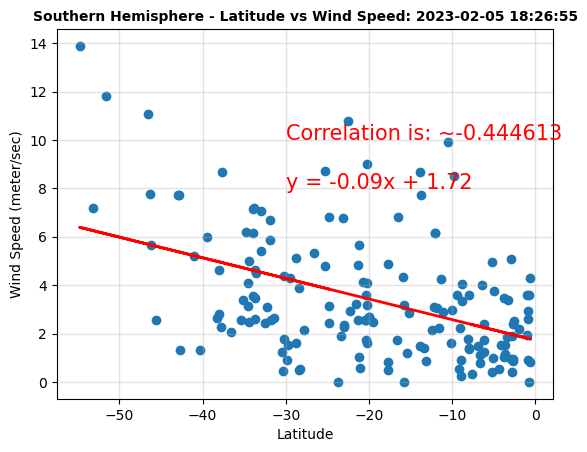

In [ ]:
# Southern Hemisphere
x_ax7 = southern_hemi["Lat"]
y_ax7 = southern_hemi["Wind Speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (meter/sec)")
plt.title(f"Southern Hemisphere - Latitude vs Wind Speed: {unixToDatetime}",fontsize = 10, fontweight="bold")
# Correlation.
corr1 = st.pearsonr(x_ax7, y_ax7)
# Linear Regression.
d_slope, d_int, d_r, d_p, d_std_err = st.linregress(x_ax7, y_ax7)
d_fit = d_slope * x_ax5 + d_int
# Plot the main scatter.
plt.scatter(x_ax7, y_ax7)
# Plot the line.
plt.plot(x_ax7 ,d_fit,"r-", linewidth=2)
# get the equation and text generated into variables to display later to chart.
line_eq = "y = " + str(round(d_slope,2)) + "x + " + str(round(d_int,2))
line_eq1 = "Correlation is: ~" + str(round(corr1[0],6))
# add the line equation to the chart.
plt.annotate(line_eq, (-30, 8), fontsize=15,color="red")
# add the Correlation to the chart.
plt.text(-30, 10, line_eq1, fontsize=15,color="red")
plt.grid(linestyle='-', linewidth=1, alpha = 0.35)
# Show the graph
plt.show()

### Add discussion about the linear relationship:
The main takeaway from the data is that because we are randomly generating the locations and at different points in time, the weather changes and so the correlation changes for all points in latitude vs Temperature, Humidity, Wind Speed and Cloudiness.
Weather is unpredictable they say. They could be right. :)
But with the data that we do have here are the following findings:
1) The strongest correlation is between temperature and latitude. There is definitely a strong case to be made that on a general basis the more north you go the colder it gets.
2) The southern hemisphere
3) 

Overall this would all have to be studied over multiple days and different points in time on a much larger scale to start seeing patterns in otherwise unpredictable weather.
